In [0]:
from functools import reduce
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # standard graphics
import seaborn as sns # fancier graphics
pd.set_option('display.max_columns',80)
pd.set_option('display.max_rows',600)

In [0]:
#connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df_climb = pd.read_csv('/content/drive/My Drive/climbing_statistics.csv')
df_weather = pd.read_csv('/content/drive/My Drive/Rainier_Weather.csv')

In [0]:
df_climb.head()

,date,Route,Attempted,Succeeded,Success Percentage
0,11/27/2015,Disappointment Cleaver,2,0,0.0
1,11/21/2015,Disappointment Cleaver,3,0,0.0
2,10/15/2015,Disappointment Cleaver,2,0,0.0
3,10/13/2015,Little Tahoma,8,0,0.0
4,10/9/2015,Disappointment Cleaver,2,0,0.0


In [0]:
df_climb.dtypes

date                   object
Route                  object
Attempted               int64
Succeeded               int64
Success Percentage    float64
dtype: object

In [0]:
df_weather.head()

,Date,Battery Voltage AVG,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solare Radiation AVG
0,12/31/2015,13.845000,19.062917,21.870833,21.977792,62.325833,84.915292
1,12/30/2015,13.822917,14.631208,18.493833,3.540542,121.505417,86.192833
2,12/29/2015,13.834583,6.614292,34.072917,0.000000,130.291667,85.100917
3,12/28/2015,13.710417,8.687042,70.557917,0.000000,164.683750,86.241250
4,12/27/2015,13.362500,14.140417,95.754167,0.000000,268.479167,31.090708


In [0]:
df_weather.dtypes

Date                      object
Battery Voltage AVG      float64
Temperature AVG          float64
Relative Humidity AVG    float64
Wind Speed Daily AVG     float64
Wind Direction AVG       float64
Solare Radiation AVG     float64
dtype: object

In [0]:
import sqlite3

In [0]:
conn = sqlite3.connect("climb_weather.db")
conn.execute("DROP TABLE IF EXISTS `climb`")
print("climb Table dropped")
conn.close()

conn = sqlite3.connect("climb_weather.db")
conn.execute("DROP TABLE IF EXISTS `weather`")
print("weather Table dropped")
conn.close()

climb Table dropped
weather Table dropped


In [0]:
conn = sqlite3.connect("climb_weather.db")
try:
  conn.execute('''
      CREATE TABLE climb
      (date                TEXT    NOT NULL,
       route               TEXT    NOT NULL,
       attempted           FLOAT   DEFAULT 0,
       succeeded           FLOAT   DEFAULT 0,
       succeeded_rate      FLOAT   DEFAULT 0
       );''')
  print("climb Table created successfully")
except Exception as e:
  print(str(e))
  print('climb Table creation failed!!!')
finally:
  conn.close()

conn = sqlite3.connect("climb_weather.db")
try:
  conn.execute('''
      CREATE TABLE weather
      (Date               TEXT    NOT NULL,
       battery_v          FLOAT   DEFAULT 0,     
       temperature        FLOAT   DEFAULT 0,     
       humidity           FLOAT   DEFAULT 0,     
       wind_speed         FLOAT   DEFAULT 0,     
       wind_direct        FLOAT   DEFAULT 0,     
       solar              FLOAT   DEFAULT 0
       );''')
  print("weather Table created successfully")
except Exception as e:
  print(str(e))
  print('weather Table creation failed!!!')
finally:
  conn.close()

climb Table created successfully
weather Table created successfully


In [0]:
climb_list = df_climb.values.tolist()
weather_list = df_weather.values.tolist()

In [0]:
conn = sqlite3.connect("climb_weather.db")

cursor = conn.cursor()

try:
  cursor.executemany('''
        INSERT INTO climb (date, route, attempted, succeeded, succeeded_rate)
        VALUES (?,?,?,?,?)''', climb_list)
  conn.commit()
  print("climb Data Insterted successfully")
except Exception as e:
  print(str(e))
  print("climb Insertion failed!")
finally:
  conn.close()

conn = sqlite3.connect("climb_weather.db")

cursor = conn.cursor()

try:
  cursor.executemany('''
        INSERT INTO weather (Date, battery_v, temperature, humidity, wind_speed, wind_direct, solar)
        VALUES (?,?,?,?,?,?,?)''', weather_list)
  conn.commit()
  print("weather Data Insterted successfully")
except Exception as e:
  print(str(e))
  print("weather Insertion failed!")
finally:
  conn.close()

climb Data Insterted successfully
weather Data Insterted successfully


In [0]:
conn = sqlite3.connect("climb_weather.db")
cursor = conn.cursor()
cursor.execute("SELECT count(*) as Total FROM climb;")
rows = cursor.fetchall()
for row in rows:
  print(row)
conn.close()

conn = sqlite3.connect("climb_weather.db")
cursor = conn.cursor()
cursor.execute("SELECT count(*) as Total FROM weather;")
rows = cursor.fetchall()
for row in rows:
  print(row)
conn.close()

(4077,)
(464,)


In [0]:
conn = sqlite3.connect("climb_weather.db")
df_climb_agg = pd.read_sql_query("select date, Route, sum(attempted) as attempted, sum(succeeded) as succeeded, sum(succeeded)/sum(attempted) as succeeded_rate from Climb group by date, Route order by date", conn)
df_climb_agg.head(20)

,date,route,attempted,succeeded,succeeded_rate
0,1/16/2014,Little Tahoma,2.0,0.0,0.000000
1,1/18/2014,Gibralter Ledges,8.0,4.0,0.500000
2,1/19/2014,Gibralter Ledges,2.0,0.0,0.000000
3,1/20/2014,Fuhrer's Finger,2.0,0.0,0.000000
4,1/23/2014,Little Tahoma,2.0,0.0,0.000000
5,1/23/2015,Disappointment Cleaver,2.0,0.0,0.000000
6,1/24/2014,Gibralter Ledges,9.0,6.0,0.666667
7,1/24/2014,Ingraham Direct,2.0,0.0,0.000000
8,1/24/2015,Gibralter Ledges,4.0,0.0,0.000000
9,1/24/2015,Ingraham Direct,4.0,0.0,0.000000


In [0]:
conn = sqlite3.connect("climb_weather.db")
try:
  conn.execute('''
      DELETE FROM climb
      ''')
  print("climb Table data deleted successfully")
except Exception as e:
  print(str(e))
  print('climb Table data deleation failed!!!')
finally:
  conn.close()

climb Table data deleted successfully


In [0]:
climb_list = df_climb_agg.values.tolist()

In [0]:
conn = sqlite3.connect("climb_weather.db")

cursor = conn.cursor()

try:
  cursor.executemany('''
        INSERT INTO climb (date, route, attempted, succeeded, succeeded_rate)
        VALUES (?,?,?,?,?)''', climb_list)
  conn.commit()
  print("climb Data Insterted successfully")
except Exception as e:
  print(str(e))
  print("climb Insertion failed!")
finally:
  conn.close()

climb Data Insterted successfully


In [0]:
conn = sqlite3.connect("climb_weather.db")
df_climb_fin = pd.read_sql_query("select * from climb INNER JOIN weather ON climb.date = weather.Date", conn)
df_climb_fin.head(20)

,date,route,attempted,succeeded,succeeded_rate,Date,battery_v,temperature,humidity,wind_speed,wind_direct,solar
0,11/27/2015,Disappointment Cleaver,2.0,0.0,0.000000,11/27/2015,13.643750,26.321667,19.715000,27.839583,68.004167,88.496250
1,11/21/2015,Disappointment Cleaver,3.0,0.0,0.000000,11/21/2015,13.749583,31.300000,21.690708,2.245833,117.549667,93.660417
2,10/15/2015,Disappointment Cleaver,2.0,0.0,0.000000,10/15/2015,13.461250,46.447917,27.211250,17.163625,259.121375,138.387000
3,10/13/2015,Little Tahoma,8.0,0.0,0.000000,10/13/2015,13.532083,40.979583,28.335708,19.591167,279.779167,176.382667
4,10/9/2015,Disappointment Cleaver,2.0,0.0,0.000000,10/9/2015,13.216250,38.260417,74.329167,65.138333,264.687500,27.791292
5,10/3/2015,Disappointment Cleaver,10.0,0.0,0.000000,10/3/2015,13.577500,31.822917,62.337083,13.125042,153.931667,196.375208
6,10/3/2015,Disappointment Cleaver,2.0,0.0,0.000000,10/3/2015,13.577500,31.822917,62.337083,13.125042,153.931667,196.375208
7,10/2/2015,Kautz Glacier,2.0,0.0,0.000000,10/2/2015,13.505000,36.064167,47.017375,6.445917,247.318333,176.265542
8,10/2/2015,Disappointment Cleaver,2.0,0.0,0.000000,10/2/2015,13.505000,36.064167,47.017375,6.445917,247.318333,176.265542
9,9/30/2015,Disappointment Cleaver,2.0,0.0,0.000000,9/30/2015,13.483333,38.729583,57.369583,11.300750,216.934167,202.812750


In [0]:
conn = sqlite3.connect("climb_weather.db")
try:
  conn.execute('''
      CREATE TABLE fin AS
      select * from climb INNER JOIN weather ON climb.date = weather.Date;''')
  print("fin Table created successfully")
except Exception as e:
  print(str(e))
  print('fin Table creation failed!!!')
finally:
  conn.close()

table fin already exists
fin Table creation failed!!!


In [0]:
conn = sqlite3.connect("climb_weather.db")
try:
  conn.execute('''
      UPDATE fin SET wind_direct = 'N' where wind_direct < 45 or wind_direct > 315;''')
  print("fin Table updated successfully")
except Exception as e:
  print(str(e))
  print('fin Table updated failed!!!')
finally:
  conn.commit()
  conn.close()

fin Table updated successfully


In [0]:
conn = sqlite3.connect("climb_weather.db")
try:
  conn.execute('''
      UPDATE fin SET wind_direct = 'E' where wind_direct >= 45 and wind_direct <135;''')
  print("fin Table updated successfully")
except Exception as e:
  print(str(e))
  print('fin Table updated failed!!!')
finally:
  conn.commit()
  conn.close()

fin Table updated successfully


In [0]:
conn = sqlite3.connect("climb_weather.db")
try:
  conn.execute('''
      UPDATE fin SET wind_direct = 'S' where wind_direct >= 135 and wind_direct < 225;''')
  print("fin Table updated successfully")
except Exception as e:
  print(str(e))
  print('fin Table updated failed!!!')
finally:
  conn.commit()
  conn.close()

fin Table updated successfully


In [0]:
conn = sqlite3.connect("climb_weather.db")
try:
  conn.execute('''
      UPDATE fin SET wind_direct = 'W' where wind_direct >= 225 and wind_direct < 315;''')
  print("fin Table updated successfully")
except Exception as e:
  print(str(e))
  print('fin Table updated failed!!!')
finally:
  conn.commit()
  conn.close()

fin Table updated successfully


In [0]:
conn = sqlite3.connect("climb_weather.db")
df_climb_fin = pd.read_sql_query("select date, route, succeeded_rate, battery_v, temperature, humidity, wind_speed, wind_direct, solar from fin", conn)
df_climb_fin.head(5)

,date,route,succeeded_rate,battery_v,temperature,humidity,wind_speed,wind_direct,solar
0,11/27/2015,Disappointment Cleaver,0.0,13.643750,26.321667,19.715000,27.839583,N,88.496250
1,11/21/2015,Disappointment Cleaver,0.0,13.749583,31.300000,21.690708,2.245833,N,93.660417
2,10/15/2015,Disappointment Cleaver,0.0,13.461250,46.447917,27.211250,17.163625,N,138.387000
3,10/13/2015,Little Tahoma,0.0,13.532083,40.979583,28.335708,19.591167,N,176.382667
4,10/9/2015,Disappointment Cleaver,0.0,13.216250,38.260417,74.329167,65.138333,N,27.791292


In [0]:
conn = sqlite3.connect("climb_weather.db")
df = pd.read_sql_query("select * from fin where succeeded_rate > 1;", conn)
df.head()

,date,route,attempted,succeeded,succeeded_rate,Date:1,battery_v,temperature,humidity,wind_speed,wind_direct,solar


In [0]:
conn = sqlite3.connect("climb_weather.db")
try:
  conn.execute('''
      DELETE FROM fin where succeeded_rate > 1 or route like 'glacier%';''')
  print("fin Table deleted successfully")
except Exception as e:
  print(str(e))
  print('fin Table delete failed!!!')
finally:
  conn.commit()
  conn.close()

fin Table deleted successfully


In [0]:
conn = sqlite3.connect("climb_weather.db")
df = pd.read_sql_query("select route, sum(attempted), sum(succeeded) from fin group by route order by sum(attempted) desc;", conn)
df

,route,sum(attempted),sum(succeeded)
0,Disappointment Cleaver,14928.0,7288.0
1,Emmons-Winthrop,2907.0,1557.0
2,Kautz Glacier,1046.0,534.0
3,Little Tahoma,294.0,112.0
4,Ingraham Direct,198.0,14.0
5,Fuhrers Finger,180.0,26.0
6,Gibralter Ledges,160.0,22.0
7,Liberty RIngraham Directge,146.0,64.0
8,Ptarmigan RIngraham Directge,38.0,18.0
9,Kautz Cleaver,34.0,12.0


[Text(0, 0, 'Tahoma Cleaver'),
 Text(0, 0, 'Ptarmigan RIngraham Directge'),
 Text(0, 0, 'Kautz Glacier'),
 Text(0, 0, 'Curtis RIngraham Directge'),
 Text(0, 0, 'Success Cleaver'),
 Text(0, 0, 'Emmons-Winthrop'),
 Text(0, 0, 'Liberty RIngraham Directge'),
 Text(0, 0, 'Little Tahoma'),
 Text(0, 0, 'Disappointment Cleaver'),
 Text(0, 0, 'Tahoma Glacier'),
 Text(0, 0, 'Mowich Face'),
 Text(0, 0, 'Kautz Cleaver'),
 Text(0, 0, 'Fuhrers Finger'),
 Text(0, 0, 'Ingraham Direct'),
 Text(0, 0, 'Gibralter Ledges'),
 Text(0, 0, 'Gibralter Chute'),
 Text(0, 0, 'Nisqually Glacier'),
 Text(0, 0, 'Sunset RIngraham Directge'),
 Text(0, 0, 'Unknown'),
 Text(0, 0, 'Wilson Headwall')]

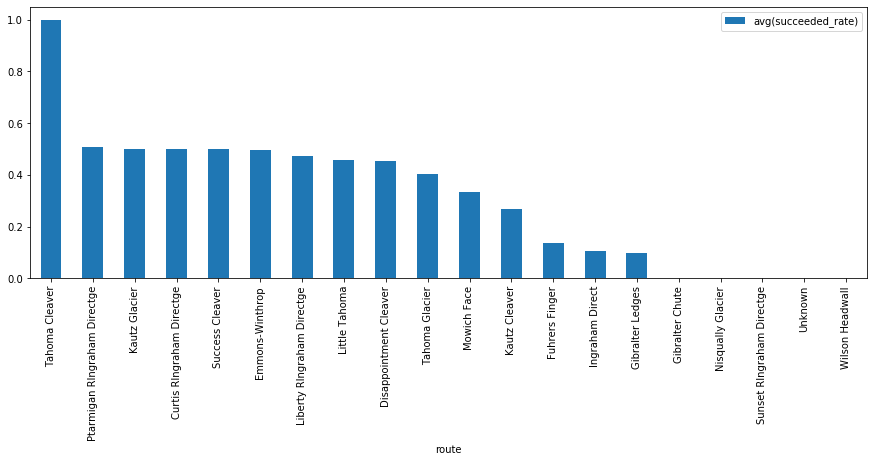

In [0]:
conn = sqlite3.connect("climb_weather.db")
df = pd.read_sql_query("select route, sum(attempted), sum(succeeded), avg(succeeded_rate) from fin group by route order by avg(succeeded_rate) desc;", conn)
ax = df.plot.bar(x='route', y='avg(succeeded_rate)', rot=0, figsize=(15,5))
ax.set_xticklabels(df['route'], rotation=90)

[Text(0, 0, 'Tahoma Cleaver'),
 Text(0, 0, 'Ptarmigan RIngraham Directge'),
 Text(0, 0, 'Kautz Glacier'),
 Text(0, 0, 'Curtis RIngraham Directge'),
 Text(0, 0, 'Success Cleaver'),
 Text(0, 0, 'Emmons-Winthrop'),
 Text(0, 0, 'Liberty RIngraham Directge'),
 Text(0, 0, 'Little Tahoma'),
 Text(0, 0, 'Disappointment Cleaver'),
 Text(0, 0, 'Tahoma Glacier'),
 Text(0, 0, 'Mowich Face'),
 Text(0, 0, 'Kautz Cleaver'),
 Text(0, 0, 'Fuhrers Finger'),
 Text(0, 0, 'Ingraham Direct'),
 Text(0, 0, 'Gibralter Ledges'),
 Text(0, 0, 'Gibralter Chute'),
 Text(0, 0, 'Nisqually Glacier'),
 Text(0, 0, 'Sunset RIngraham Directge'),
 Text(0, 0, 'Unknown'),
 Text(0, 0, 'Wilson Headwall')]

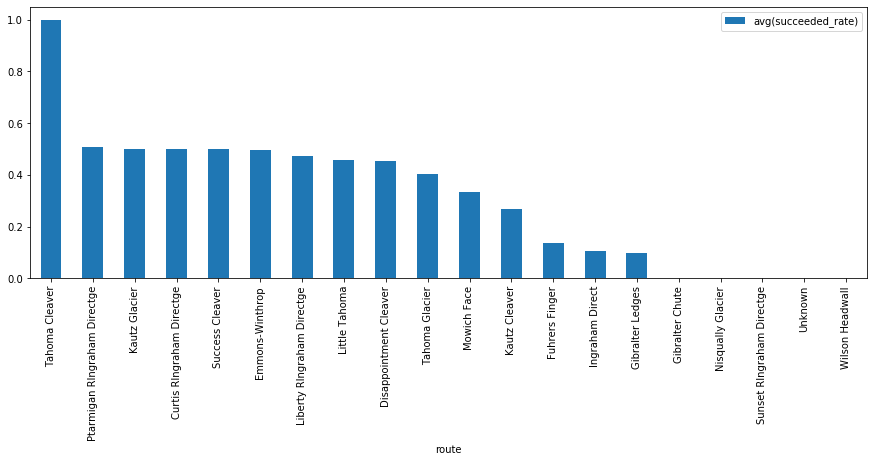

In [0]:
ax = df.plot.bar(x='route', y='avg(succeeded_rate)', rot=0, figsize=(15,5))
ax.set_xticklabels(df['route'], rotation=90)

Cleaning duplicated route name

In [0]:
conn = sqlite3.connect("climb_weather.db")
try:
  conn.execute('''
      UPDATE fin SET route = 'Fuhrers Finger' where route like 'Fuhrer%';''')
  print("fin Table updated successfully")
except Exception as e:
  print(str(e))
  print('fin Table updated failed!!!')
finally:
  conn.commit()
  conn.close()

fin Table updated successfully


In [0]:
conn = sqlite3.connect("climb_weather.db")
df = pd.read_sql_query("select route, sum(attempted), sum(succeeded), avg(succeeded_rate), wind_direct from fin group by route, wind_direct order by route;", conn)
df

,route,sum(attempted),sum(succeeded),avg(succeeded_rate),wind_direct
0,Curtis RIngraham Directge,8.0,4.0,0.500000,N
1,Disappointment Cleaver,14928.0,7288.0,0.454808,N
2,Emmons-Winthrop,2907.0,1557.0,0.494398,N
3,Fuhrers Finger,180.0,26.0,0.135204,N
4,Gibralter Chute,6.0,0.0,0.000000,N
5,Gibralter Ledges,160.0,22.0,0.099206,N
6,Ingraham Direct,198.0,14.0,0.104762,N
7,Kautz Cleaver,34.0,12.0,0.269231,N
8,Kautz Glacier,1046.0,534.0,0.501869,N
9,Liberty RIngraham Directge,146.0,64.0,0.474359,N


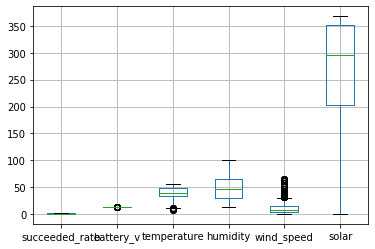

In [0]:
df_climb_fin.boxplot()

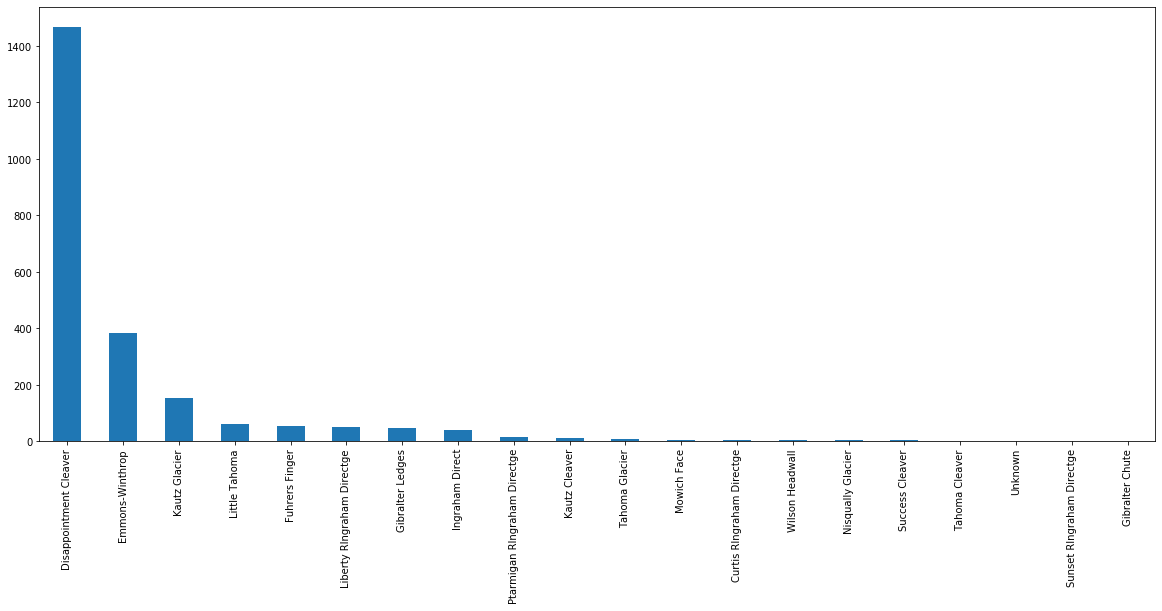

In [0]:
f, ax = plt.subplots(1, 1, figsize = (20, 8))
df_climb_fin.route.value_counts().plot(kind ="bar", ax = ax)

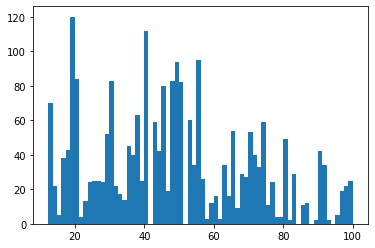

In [0]:
plt.hist(df_climb_fin['humidity'], 70)
plt.show()

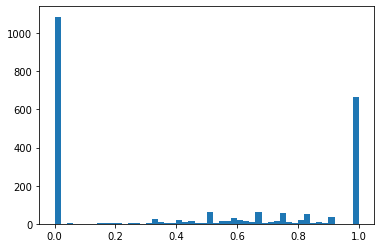

In [0]:
plt.hist(df_climb_fin['succeeded_rate'], 50)
plt.show()

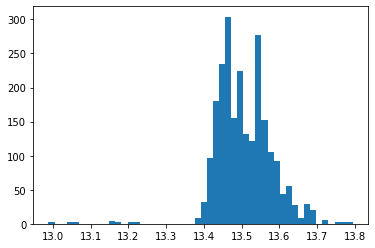

In [0]:
plt.hist(df_climb_fin['battery_v'], 50)
plt.show()

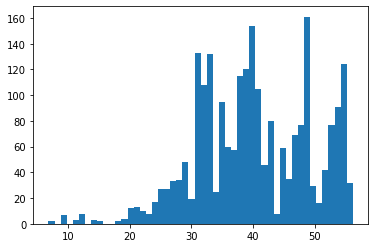

In [0]:
plt.hist(df_climb_fin['temperature'], 50)
plt.show()

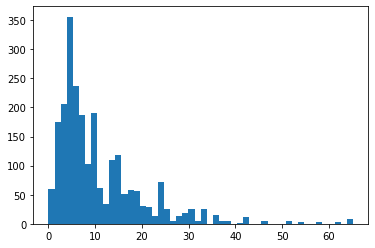

In [0]:
plt.hist(df_climb_fin['wind_speed'], 50)
plt.show()

In [0]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
num_cols= df_climb_fin.columns[df_climb_fin.dtypes.apply(lambda x: np.issubdtype(x, np.number))]
#num_cols = df_climb_fin.columns[2:]
print(num_cols)

Index(['succeeded_rate', 'battery_v', 'temperature', 'humidity', 'wind_speed',
       'solar'],
      dtype='object')


In [0]:
standardized_df = scaler.fit_transform(df_climb_fin[num_cols])

In [0]:
print(standardized_df)

[[-0.99212255  1.85039349 -1.48800423 -1.27713684  1.78395727 -1.40060376]
 [-0.99212255  3.27055721 -0.95148081 -1.18901945 -0.89214875 -1.35648623]
 [-0.99212255 -0.59855032  0.68103586 -0.94280108  0.66766926 -0.97438664]
 ...
 [-0.129179   -0.59855032 -0.52546827  0.02733197 -0.71968423 -0.03330159]
 [-0.99212255 -0.32458168  0.39130962 -0.36749308 -0.358814   -0.07866319]
 [ 0.69780857 -0.79983337  0.77223766 -1.03774419 -0.32580325 -0.09538542]]


In [0]:
standardized_df = pd.DataFrame(standardized_df, columns = num_cols)

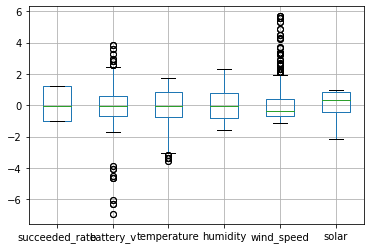

In [0]:
standardized_df.boxplot()

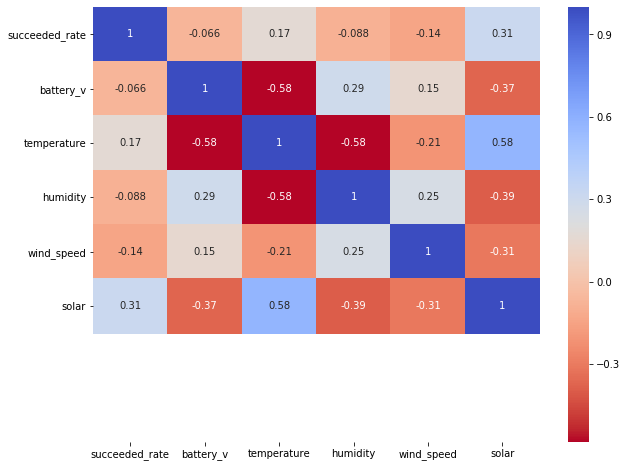

In [0]:
f, ax = plt.subplots(1, 1, figsize=(10, 8))

corr = df_climb_fin.corr()
sns.heatmap(corr, cmap="coolwarm_r", annot=True, ax=ax)
ax.set_ylim(len(df_climb_fin.columns)-1, 0)
plt.show()

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz
!tar xf spark-2.4.4-bin-hadoop2.7.tgz
!pip install -q findspark

In [0]:
import os
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

In [0]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
print(spark)

In [0]:
!ls

climb_weather.db  sample_data		     spark-2.4.4-bin-hadoop2.7.tgz
drive		  spark-2.4.4-bin-hadoop2.7  spark-2.4.4-bin-hadoop2.7.tgz.1


In [0]:
df_climb_fin1 = spark.createDataFrame(df_climb_fin)

In [0]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

In [0]:
df_climb_fin1.printSchema()

root
 |-- date: string (nullable = true)
 |-- route: string (nullable = true)
 |-- succeeded_rate: double (nullable = true)
 |-- battery_v: double (nullable = true)
 |-- temperature: double (nullable = true)
 |-- humidity: double (nullable = true)
 |-- wind_speed: double (nullable = true)
 |-- wind_direct: string (nullable = true)
 |-- solar: double (nullable = true)



In [0]:
#Input all the features in one vector column
assembler = VectorAssembler(inputCols=['battery_v', 'temperature', 'humidity', 'wind_speed', 'solar'], outputCol = 'Attributes')
#assembler = VectorAssembler(inputCols=['lstat'], outputCol = 'Attributes')

output = assembler.transform(df_climb_fin1)

#Input vs Output


In [0]:
#Input vs Output
finalized_data = output.select("Attributes","succeeded_rate") 
finalized_data.show()

+--------------------+--------------+
|          Attributes|succeeded_rate|
+--------------------+--------------+
|[13.64375,26.3216...|           0.0|
|[13.74958333,31.3...|           0.0|
|[13.46125,46.4479...|           0.0|
|[13.53208333,40.9...|           0.0|
|[13.21625,38.2604...|           0.0|
|[13.5775,31.82291...|           0.0|
|[13.5775,31.82291...|           0.0|
|[13.505,36.064166...|           0.0|
|[13.505,36.064166...|           0.0|
|[13.48333333,38.7...|           0.0|
|[13.50333333,38.3...|   0.333333333|
|[13.50458333,35.1...|           0.5|
|[13.51625,27.3220...|           0.0|
|[13.51625,27.3220...|          0.25|
|[13.51625,27.3220...|           0.0|
|[13.03708333,32.3...|          0.75|
|[13.03708333,32.3...|   0.545454545|
|[13.55375,36.0995...|           0.0|
|[13.55375,36.0995...|   0.090909091|
|[13.5425,30.87583...|           0.0|
+--------------------+--------------+
only showing top 20 rows



In [0]:
#Split training and testing data
train_data,test_data = finalized_data.randomSplit([0.7,0.3])


regressor = LinearRegression(featuresCol = 'Attributes', labelCol = 'succeeded_rate')



In [0]:
#Learn to fit the model from training set
regressor = regressor.fit(train_data)

In [0]:

#To predict the prices on testing set
pred = regressor.evaluate(test_data)

#Predict the model
pred.predictions.show()

+--------------------+--------------+--------------------+
|          Attributes|succeeded_rate|          prediction|
+--------------------+--------------+--------------------+
|[13.16,32.31,100....|           0.0|0.053335540858988395|
|[13.3775,51.13958...|   0.916666667| 0.44304820280809665|
|[13.3775,51.13958...|           1.0| 0.44304820280809665|
|[13.39666667,54.9...|           0.0|  0.5472268539592431|
|[13.39666667,54.9...|           0.0|  0.5472268539592431|
|[13.39666667,54.9...|           1.0|  0.5472268539592431|
|[13.39666667,54.9...|           1.0|  0.5472268539592431|
|[13.4,24.97708333...|           0.0| 0.38229071393875813|
|[13.4,24.97708333...|           0.0| 0.38229071393875813|
|[13.4,24.97708333...|           0.0| 0.38229071393875813|
|[13.40291667,53.1...|           1.0| 0.39476630826283277|
|[13.41041667,51.1...|           0.0| 0.46103300953510207|
|[13.41125,56.1537...|           0.0| 0.49704763865792767|
|[13.41125,56.1537...|           0.0| 0.4970476386579276

In [0]:
#coefficient of the regression model
coeff = regressor.coefficients

#X and Y intercept
intr = regressor.intercept

print ("The coefficient of the model is : %a" %coeff)
print ("The Intercept of the model is : %f" %intr)


The coefficient of the model is : DenseVector([0.3508, 0.0025, 0.0015, -0.002, 0.0012])
The Intercept of the model is : -4.748641


In [0]:
from pyspark.ml.evaluation import RegressionEvaluator
eval = RegressionEvaluator(labelCol="succeeded_rate", predictionCol="prediction", metricName="rmse")


In [0]:
# Root Mean Square Error
rmse = eval.evaluate(pred.predictions)
print("RMSE: %.3f" % rmse)

# Mean Square Error
mse = eval.evaluate(pred.predictions, {eval.metricName: "mse"})
print("MSE: %.3f" % mse)

# Mean Absolute Error
mae = eval.evaluate(pred.predictions, {eval.metricName: "mae"})
print("MAE: %.3f" % mae)

# r2 - coefficient of determination
r2 = eval.evaluate(pred.predictions, {eval.metricName: "r2"})
print("r2: %.3f" %r2)


RMSE: 0.420
MSE: 0.177
MAE: 0.385
r2: 0.113
